# **Restaurant Database: Operational Analysis**
---

**Author:** Larissa de Santi  
**GitHub:** [larisanti](https://github.com/larisanti)  
**Created:** 2023-10-21 | **Updated:** 2025-03-26  
**Database:** `restaurant_db` (MySQL) 

---
This notebook demonstrates fundamental MySQL-Python integration for viewing restaurant data. The implementation showcases:

- Basic database connection using `mysql-connector`
- SQL queries for business intelligence
- Simple table visualizations with `matplotlib`

It was designed for learning database integration techniques and viewing basic booking patterns.

---
### **1. Import necessary libraries and set up the MySQL connection:**

In [1]:
import mysql.connector
import matplotlib.pyplot as plt

In [ ]:
db_config = {
    'host': 'localhost', # Database host (change if remote)
    'user': '------',  # Insert your username
    'password': '------',  # Insert your password
    'database': 'restaurant_db'
}

### Hardcoded credentials are for local dev ONLY, do not use in production ###
### Use environment variables or a config file for production ###

try:
    conn = mysql.connector.connect(**db_config)
    cursor = conn.cursor()
    print("Successfully connected to database")
except mysql.connector.Error as err:
    print(f"Database connection failed: {err}")
    exit()

Successfully connected to database


---
### **2. Visualize record counts across all core tables:**


Database Table Record Counts:
• Roles: 7 records
• Employees: 14 records
• Customers: 70 records
• Tables: 15 records
• MenuCategories: 8 records
• Cuisines: 8 records
• MenuItems: 40 records
• Menus: 4 records
• Bookings: 57 records
• Orders: 77 records
• OrderItems: 101 records
• OrderDeliveryStatus: 33 records


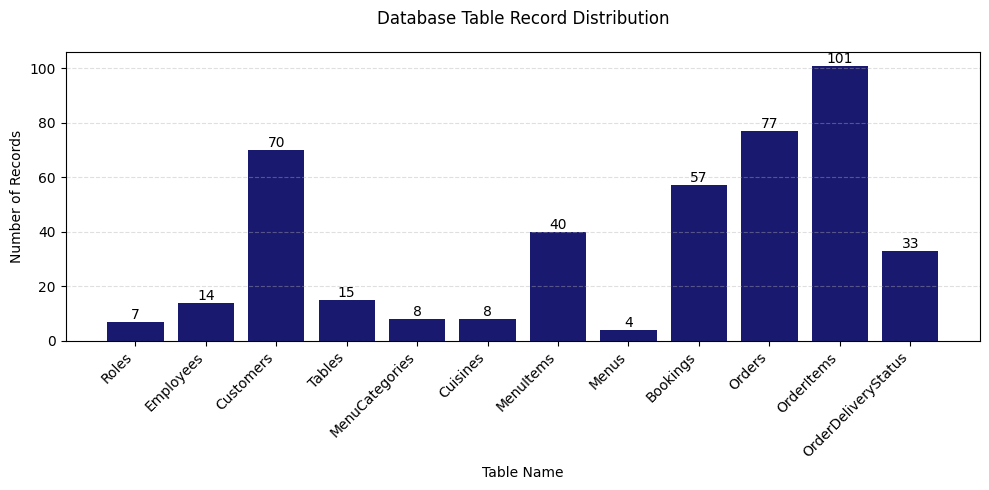

In [3]:
# List all tables in the database (except: MenuMenuItems)
tables = [
    'Roles', 'Employees', 'Customers', 'Tables', 
    'MenuCategories', 'Cuisines', 'MenuItems', 
    'Menus', 'Bookings', 
    'Orders', 'OrderItems', 'OrderDeliveryStatus'
]

# Count records in each table
print("\nDatabase Table Record Counts:")
record_counts = []
filtered_table_names = []
for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    count = cursor.fetchone()[0]
    print(f"• {table}: {count} records")
    record_counts.append(count)
    filtered_table_names.append(table)

# Visualize the counts
plt.figure(figsize=(10, 5))
bars = plt.bar(filtered_table_names, record_counts, color='midnightblue')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Database Table Record Distribution', pad=20)
plt.xlabel('Table Name')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

---
### **3. Analysis**
#### 3.1 Employee distribution across roles:

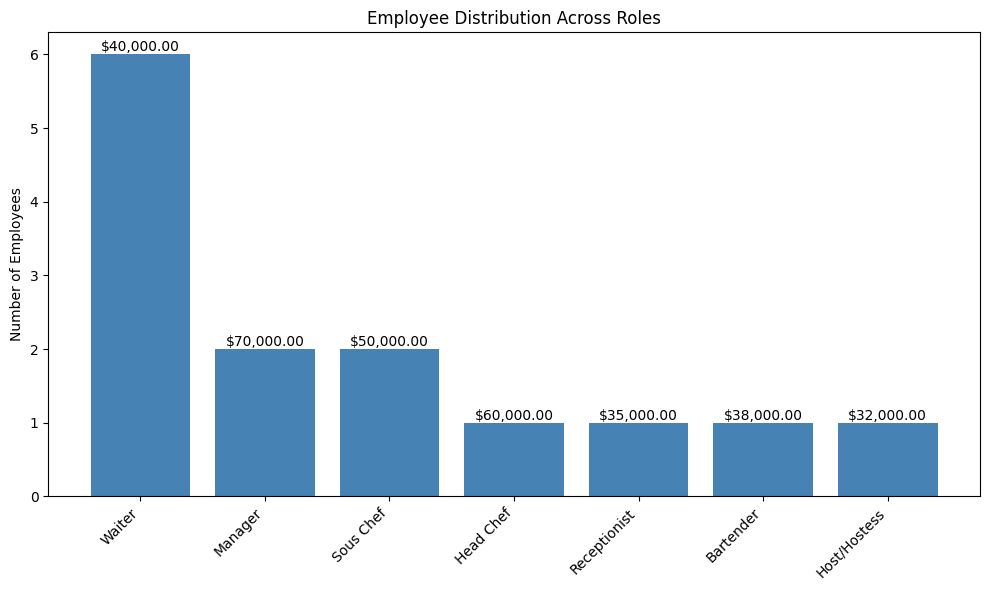

In [4]:
def employee_distribution_across_roles():
    
    cursor.execute("""
        SELECT r.RoleName, COUNT(e.EmployeeID) as EmployeeCount, r.AnnualSalary
        FROM Employees e
        JOIN Roles r ON e.RoleID = r.RoleID
        GROUP BY r.RoleName, r.AnnualSalary
        ORDER BY EmployeeCount DESC
    """)

    role_data = cursor.fetchall()

    # Prepare data
    roles = [x[0] for x in role_data]
    counts = [x[1] for x in role_data]
    salaries = [x[2] for x in role_data]

    # Bar chart for employee count
    plt.figure(figsize=(10, 6))
    bars = plt.bar(roles, counts, color='steelblue')
    plt.ylabel('Number of Employees')
    plt.title('Employee Distribution Across Roles')

    # Add salary information on top of bars
    for bar, salary in zip(bars, salaries):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'${salary:,.2f}',
                 ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

employee_distribution_across_roles()

#### 3.2 Menu items distribution by category:

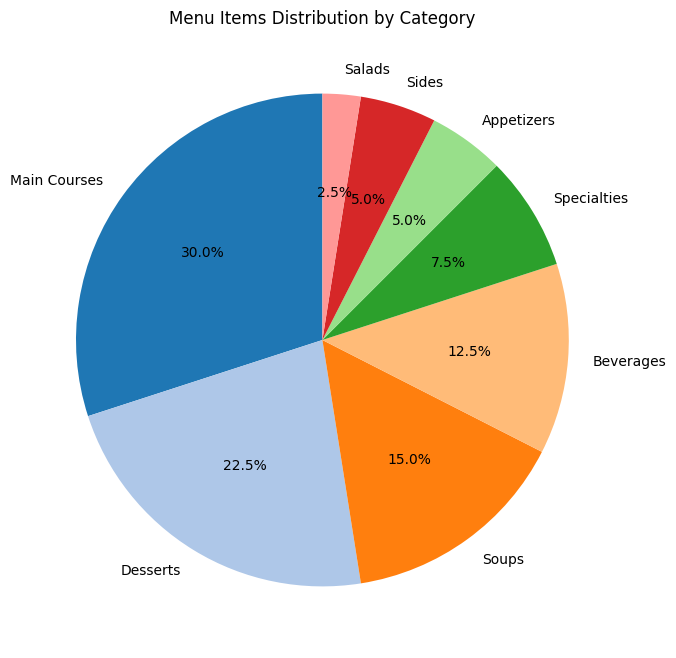

In [5]:
def items_distribution_by_category():

    cursor.execute("""
        SELECT mc.CategoryName, COUNT(mi.ItemID) as ItemCount
        FROM MenuItems mi
        JOIN MenuCategories mc ON mi.CategoryID = mc.CategoryID
        GROUP BY mc.CategoryName
        ORDER BY ItemCount DESC
    """)

    category_data = cursor.fetchall()

    # Prepare data
    categories = [x[0] for x in category_data]
    counts = [x[1] for x in category_data]

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=categories, autopct='%1.1f%%', 
            startangle=90, colors=plt.cm.tab20.colors)
    plt.title('Menu Items Distribution by Category')
    plt.show()

items_distribution_by_category()

#### 3.3 Booking activity by hour

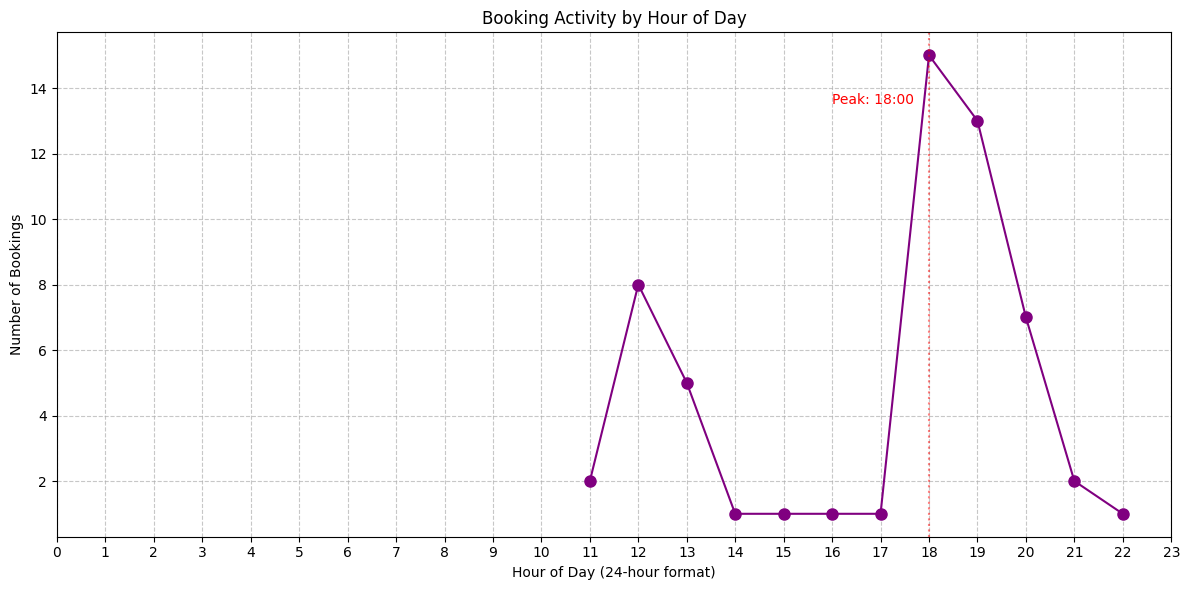

In [19]:
def booking_activity_by_hour():
    try:
        # Check if there are unread results
        while cursor.nextset():
            pass  # Consume any unread results
        
        cursor.execute("""
            SELECT HOUR(BookingDate) as HourOfDay, 
                   COUNT(*) as BookingCount
            FROM Bookings
            GROUP BY HOUR(BookingDate)
            ORDER BY HOUR(BookingDate)
        """)

        booking_data = cursor.fetchall()

        # Prepare data
        hours = [x[0] for x in booking_data]
        counts = [x[1] for x in booking_data]

        # Create line chart
        plt.figure(figsize=(12, 6))
        plt.plot(hours, counts, marker='o', linestyle='-', color='purple', markersize=8)
        
        # Customize x-axis
        plt.xticks(range(24))
        plt.xlim(0, 23)
        
        plt.title('Booking Activity by Hour of Day')
        plt.xlabel('Hour of Day (24-hour format)')
        plt.ylabel('Number of Bookings')
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Highlight peak hours if data exists
        if counts:
            max_hour = hours[counts.index(max(counts))]
            plt.axvline(x=max_hour, color='red', linestyle=':', alpha=0.5)
            plt.text(max_hour-2, max(counts)*0.9, f'Peak: {max_hour}:00', color='red')
        
        plt.tight_layout()
        plt.show()

    except mysql.connector.Error as err:
        print(f"Database error: {err}")
    except Exception as e:
        print(f"General error: {e}")

booking_activity_by_hour()

#### 3.4 Order status distribution

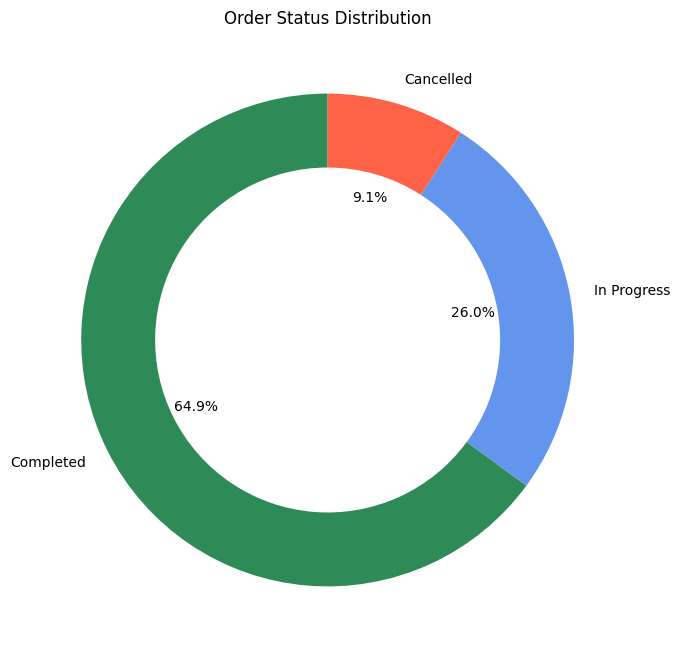

In [ ]:
def order_status_distribution():
    
    cursor.execute("""
        SELECT Status, COUNT(*) as StatusCount
        FROM Orders
        GROUP BY Status
    """)

    status_data = cursor.fetchall()

    # Prepare data
    statuses = [x[0] for x in status_data]
    counts = [x[1] for x in status_data]

    # Define your custom colors
    colors = ['seagreen', 'cornflowerblue', 'tomato'] # corrected line

    # Create donut chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=statuses, autopct='%1.1f%%',
            wedgeprops=dict(width=0.3), startangle=90, colors=colors)
    plt.title('Order Status Distribution')
    plt.show()

order_status_distribution()


#### 3.5 Bookings per employee

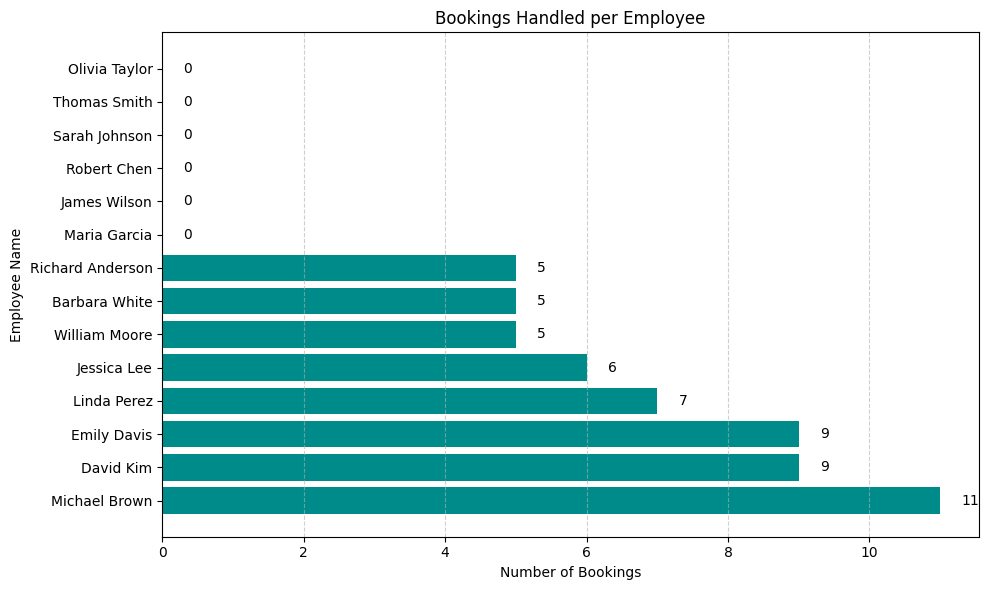

In [15]:
def bookings_per_employee():
    try:
        # Clear any unread results first
        while cursor.nextset():
            pass
            
        cursor.execute("""
            SELECT e.Name, COUNT(b.BookingID) as BookingCount
            FROM Employees e
            LEFT JOIN Bookings b ON e.EmployeeID = b.EmployeeID
            GROUP BY e.Name
            ORDER BY BookingCount DESC
        """)
        
        employee_data = cursor.fetchall()
        
        # Prepare data
        employees = [x[0] for x in employee_data]
        bookings = [x[1] for x in employee_data]
        
        # Create horizontal bar chart
        plt.figure(figsize=(10, 6))
        bars = plt.barh(employees, bookings, color='darkcyan')
        
        # Add value labels
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
                    f'{int(width)}',
                    va='center', ha='left')
        
        plt.title('Bookings Handled per Employee')
        plt.xlabel('Number of Bookings')
        plt.ylabel('Employee Name')
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
        
    except mysql.connector.Error as err:
        print(f"Database error: {err}")
        
bookings_per_employee()

---
### **4. Close the connection after the analysis:**

In [ ]:
cursor.close()
conn.close()
print("Database connection closed")